In [9]:
import pandas as pd
import requests

In [11]:
response = requests.get('https://newsapi.org/v2/everything?q=india&language=en&sortBy=publishedAt&apiKey=403e4c49ccf9412f972838bfac11256f')

In [14]:
data = response.json()

In [15]:
print(data)

{'status': 'ok', 'totalResults': 26010, 'articles': [{'source': {'id': None, 'name': 'CNA'}, 'author': None, 'title': 'Boeing resumes China deliveries with 787-9 jet to Juneyao Airlines: Report', 'description': "Boeing had previously suspended new aircraft deliveries to China as US President Donald Trump's tariff war escalated between the world's two largest economies.", 'url': 'https://www.channelnewsasia.com/east-asia/boeing-resumes-787-deliveries-juneyao-airlines-trade-tensions-us-china-5182031', 'urlToImage': 'https://dam.mediacorp.sg/image/upload/s--p5evO2gO--/c_crop,h_576,w_1024,x_0,y_106/fl_relative,g_south_east,l_mediacorp:cna:watermark:2023-11:afp_watermark_14112023,w_0.1/f_auto,q_auto/c_fill,g_auto,h_676,w_1200/v1/mediacorp/cna/image/2025/06/14/000_348r3mu.jpg?itok=PENl8ZAZ', 'publishedAt': '2025-06-14T05:41:47Z', 'content': "BEIJING: Boeing delivered a new 787-9 aircraft to China's Juneyao Airlines on Saturday (Jun 14), Chinese media outlet Yicai reported, as trade tensions 

In [16]:
df = pd.DataFrame(data["articles"])

In [19]:
df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'CNA'}",None,Boeing resumes China deliveries with 787-9 jet...,Boeing had previously suspended new aircraft d...,https://www.channelnewsasia.com/east-asia/boei...,https://dam.mediacorp.sg/image/upload/s--p5evO...,2025-06-14T05:41:47Z,BEIJING: Boeing delivered a new 787-9 aircraft...
1,"{'id': 'the-times-of-india', 'name': 'The Time...",ET Online,"Delhi weather update: Thunderstorm, gusty wind...",Delhi weather news: Delhi is likely to experie...,https://economictimes.indiatimes.com/news/indi...,"https://img.etimg.com/thumb/msid-121843545,wid...",2025-06-14T05:41:42Z,The Indian Meteorological Department (IMD) has...
2,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Trump has 'trumpeted' India-Pak ceasefire clai...,The Congress party is criticizing Prime Minist...,https://economictimes.indiatimes.com/news/poli...,"https://img.etimg.com/thumb/msid-121843473,wid...",2025-06-14T05:41:35Z,The Congress on Saturday cited that on 13 occa...
3,"{'id': 'the-times-of-india', 'name': 'The Time...",Nishtha Awasthi,Gold price above Rs 1 lakh. Will Quant MF pred...,"Gold prices in India have surged, crossing Rs ...",https://economictimes.indiatimes.com/markets/c...,"https://img.etimg.com/thumb/msid-121843351,wid...",2025-06-14T05:37:05Z,Amid safe-haven buying due to Israel-Iran tens...
4,"{'id': 'the-times-of-india', 'name': 'The Time...",ET Online,"Five years after Sushant Singh Rajput's death,...",Actor Sushant Singh Rajput was found dead five...,https://economictimes.indiatimes.com/magazines...,"https://img.etimg.com/thumb/msid-121843087,wid...",2025-06-14T05:36:06Z,"On this day, five years ago, actor Sushant Sin..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       99 non-null     object
 1   author       91 non-null     object
 2   title        99 non-null     object
 3   description  98 non-null     object
 4   url          99 non-null     object
 5   urlToImage   94 non-null     object
 6   publishedAt  99 non-null     object
 7   content      99 non-null     object
dtypes: object(8)
memory usage: 6.3+ KB


In [23]:
df.shape



(98, 8)

In [26]:
df = df.dropna(subset=["title", "description", "source"])
#removes any row with these above missing features

In [28]:
# Headline length in words
df["headline_len"] = df["title"].apply(lambda x: len(x.split()))

# Description length in words
df["desc_len"] = df["description"].apply(lambda x: len(x.split()))

# Source name from nested dict
df["source_name"] = df["source"].apply(lambda x: x["name"])

# Day of week from published date
df["publishedAt"] = pd.to_datetime(df["publishedAt"])
df["day_of_week"] = df["publishedAt"].dt.dayofweek  # Monday=0, Sunday=6


In [29]:
df.shape

(98, 12)

In [31]:
#EDA
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
df.describe()


(98, 12)
source                       object
author                       object
title                        object
description                  object
url                          object
urlToImage                   object
publishedAt     datetime64[ns, UTC]
content                      object
headline_len                  int64
desc_len                      int64
source_name                  object
day_of_week                   int32
dtype: object
source          0
author          7
title           0
description     0
url             0
urlToImage      4
publishedAt     0
content         0
headline_len    0
desc_len        0
source_name     0
day_of_week     0
dtype: int64


,headline_len,desc_len,day_of_week
count,98.000000,98.000000,98.000000
mean,12.744898,34.581633,4.969388
std,4.346610,8.954551,0.173150
min,2.000000,11.000000,4.000000
25%,10.000000,30.000000,5.000000
50%,12.500000,37.000000,5.000000
75%,15.000000,41.000000,5.000000
max,24.000000,48.000000,5.000000


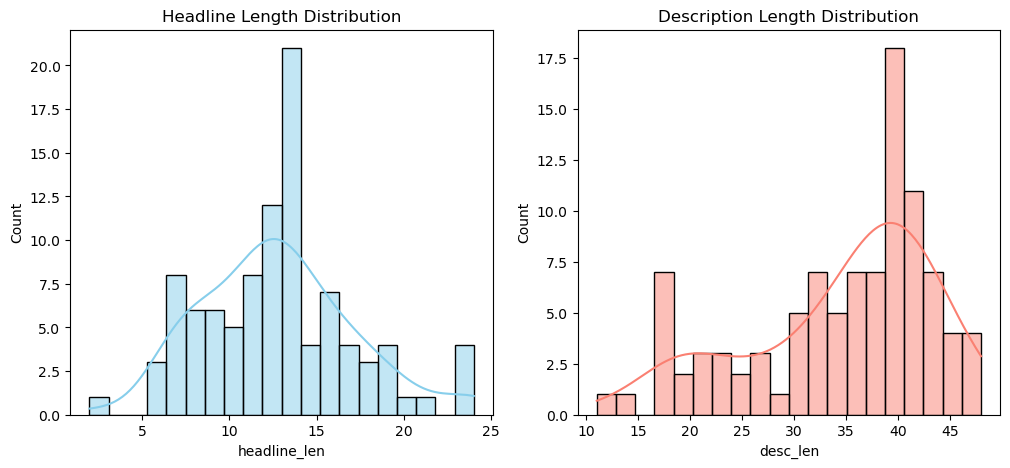

In [36]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["headline_len"], bins=20, kde=True, color='skyblue')
plt.title("Headline Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["desc_len"], bins=20, kde=True, color='salmon')
plt.title("Description Length Distribution")

plt.show()


In [38]:
# Example rule: articles with long description + long headline are "popular"
df["is_popular"] = ((df["desc_len"] > 35) & (df["headline_len"] > 13)).astype(int)


In [39]:
# Input features
X = df[["headline_len", "desc_len", "source_name"]]
X = pd.get_dummies(X, columns=["source_name"], drop_first=True)

# Target column
y = df["is_popular"]



In [40]:
print("Input shape:", X.shape)
print("Output shape:", y.shape)
print(X.head())
print(y.head())


Input shape: (98, 27)
Output shape: (98,)
   headline_len  desc_len  source_name_ABC News (AU)  source_name_BBC News  \
0            11        23                      False                 False   
1            12        39                      False                 False   
2            14        37                      False                 False   
3            12        38                      False                 False   
4            21        40                      False                 False   

   source_name_Benzinga  source_name_Biztoc.com  source_name_BusinessLine  \
0                 False                   False                     False   
1                 False                   False                     False   
2                 False                   False                     False   
3                 False                   False                     False   
4                 False                   False                     False   

   source_name_CNA  source

In [41]:
#train test split
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Target label distribution in train:", y_train.value_counts())
print("Target label distribution in test:", y_test.value_counts())


Training set size: 78
Test set size: 20
Target label distribution in train: is_popular
0    57
1    21
Name: count, dtype: int64
Target label distribution in test: is_popular
0    14
1     6
Name: count, dtype: int64


In [43]:
#logistic regression
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [44]:
# Predict on test set
y_pred = model.predict(X_test)


In [45]:
#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Print scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1 Score: 0.8333333333333334

Confusion Matrix:
 [[13  1]
 [ 1  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.83      0.83      0.83         6

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20

